## 新しい写像を定義し量子論の計算

古典写像系で示した様SimpleQmapをHarperMapに拡張し，量子論の計算を行う．

In [1]:
# ipython notebookを使わない場合は次の命令は無視して下さい
%matplotlib inline

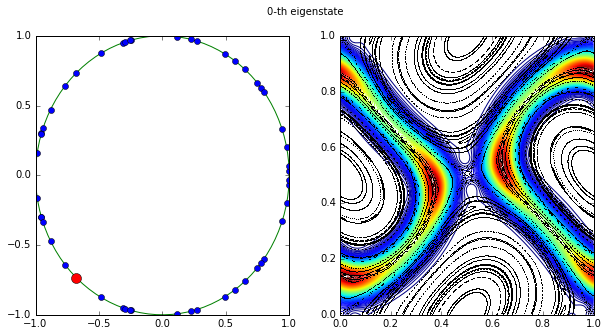

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleQmap as sq

twopi = 2.0*np.pi
class HarperMap(sq.StandardMap):
    def __init__(self, k,a):
        sq.StandardMap.__init__(self,k)
        self.a = a
    def func1(self, x):
        return a*np.sin(twopi*x)/twopi
    def ifunc1(self,x):
        return -a*np.cos(twopi*x)/twopi/twopi

def Traj(map,sample=50,tmax=500):
    q = np.random.random(sample)
    p = (np.random.random(sample) -0.5) * (pmax - pmin) * 2
    res = [np.array([])]*2
    for i in range(tmax):
        pp = p - map.func0(q)
        qq = q + map.func1(pp)
        q = qq - np.floor(qq)
        p = pp - np.floor(pp)
        res[0] = np.append(res[0],q)
        res[1] = np.append(res[1],p)
    return res


dim = 50
k,a = 1,1
qmin, qmax = 0, 1
pmin, pmax = 0, 1 

map = HarperMap(k,a)

traj = Traj(map)

domain = [[qmin,qmax],[pmin,pmax]]
qmap = sq.Qmap(map, dim, domain) # defines the quantum system
evals, evecs = qmap.eigen() # return eigenvalues and list of eigenvector of the system. 


for i, evec in enumerate(evecs):
    fig,axs = plt.subplots(1,2,figsize=(10,5))

    #evec.savetxt("data.dat",rep="p") # rep = "q", "p" or "hsm"
    
    theta = np.linspace(-np.pi, np.pi, 100)
    z = np.exp(1.j*theta)
    axs[0].plot(z.real, z.imag,'-g')
    axs[0].plot(evals.real, evals.imag, 'ob')
    axs[0].plot(evals[i].real, evals[i].imag, 'or', markersize=10)

    x,y,z = evec.hsmrep(row=100,col=100)
    axs[1].contour(x,y,z,100)
    axs[1].plot(traj[0],traj[1],',k')
    
    fig.suptitle("%d-th eigenstate" % i)
    plt.show()
    break 